# **Tugas Besar Statistika** 

Anggota Kelompok :
1. Irwan Reza Firmansyah
2. Muhammad Fachri Habibi
3. Ramadito Ferdian Assa
4. Restu Aditya Rachman



# **Research Question**

1. Bagaimana standard deviasi, mean, dan quartile dari data bank churners?
1. Bagaimana distribusi umur customer yang ada pada bank churners?
1. Bagaimana perbandingan gender pada data bank churners?
1. Bagaimana hubungan antara card category dengan Credit Limit?
1. Apakah Customer Age dapat mempengaruhi jumlah customer yang in active selama 12 bulan?
1. Bagaimana korelasi antara jumlah transaksi dan jumlah kredit yang dikeluarkan?
1. Bagaimana korelasi pada setiap kolomnya pada data bank churners?


# **Colect Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as ex
import seaborn as sns
import urllib.request

In [2]:
def get_pdf():
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    url = "https://cdn.discordapp.com/attachments/684771924932690029/794220478423498762/BankChurners.csv"
    headers={'User-Agent':user_agent,} 
    
    request=urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    return response

data_csv = get_pdf()
data = pd.read_csv(data_csv)

In [3]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# **Wragle Data**

In [6]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
           'Marital_Status', 'Months_on_book', 'CLIENTNUM', 'Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Dependent_count',
           'Attrition_Flag', 'Education_Level', 'Income_Category'], axis=1, inplace=True)

In [ ]:
data.head(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,M,3,High School,$60K - $80K,Blue,5,1,12691.0,777,11914.0,1144,42,0.061
1,49,F,5,Graduate,Less than $40K,Blue,6,1,8256.0,864,7392.0,1291,33,0.105
2,51,M,3,Graduate,$80K - $120K,Blue,4,1,3418.0,0,3418.0,1887,20,0.000
3,40,F,4,High School,Less than $40K,Blue,3,4,3313.0,2517,796.0,1171,20,0.760
4,40,M,3,Uneducated,$60K - $80K,Blue,5,1,4716.0,0,4716.0,816,28,0.000


# **Visualize And Analyze Data**



**1. Bagaimana standard deviasi, mean, dan quartile dari data bank churners**

In [7]:
data.describe()

,Customer_Age,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,3.812580,2.341167,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,8.016814,1.554408,1.010622,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,26.000000,1.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,41.000000,3.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,46.000000,4.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,52.000000,5.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,73.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


**2. Bagaimana distribusi umur customer yang ada pada bank churner**

Dilihat dari bentuk histogram dibawah ini, maka dapat disimpulkan bahwa umur customer pada data bank churners berdistribusi normal


In [8]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data["Customer_Age"]))
fig.update_layout(height=500, width=1000, title_text="Distribusi Umur Customer")
fig.show()

**3. Bagaimana perbandingan gender pada data bank churners**

Dari pie chart dibawah, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dimana lebih banyak pengguna perempuan yang memiliki rasio 52.9%, sedangkan pengguna pria hanya memiliki 47.1%

In [9]:
ex.pie(data,names='Gender',title='Propotion Of Customer Genders')

**4. Bagaimana hubungan antara card category dengan umur**

**Deskripsi**

Dari keempat boxplot berdasarkan Card Category tersebut, maka dapat disimpulkan pemakaian yang paling besar yaitu terdapat pada kartu berjenis Blue. Jenis kartu blue memiliki pencilan setelah nilai maksimumnya, yang berarti terdapat total transaksi pada kartu berjenis blue yang bernilai ekstrem dari total transaksi jenis kartu lainya

**Boxplot Card Platinum**

distribusi data cenderung menjulur ke arah kanan maka kemiringan dari distribusi pada boxplot card platinum bernilai positif

**Boxplot Card Silver**

distribusi data cenderung menjulur ke arah kanan maka kemiringan dari distribusi data pada boxplot card silver bernilai positif

**Boxplot Card Gold**

distribusi data cenderung menjulur ke arah kiri maka kemiringan dari distribusi data pada boxplot card gold bernilai negatif

**Boxplot Card Blue**

distribusi data cenderung menjulur ke arah kiri maka kemiringan dari distribusi data pada boxplot card blue bernilai negatif

In [10]:
fig = go.Figure()

fig.add_trace(go.Box(x=data["Total_Trans_Amt"], y=data["Card_Category"],))
fig.update_layout(title_text="Boxplot Card Category dengan Customer Age", yaxis_title="Customer Age", xaxis_title="Card Category")
fig.update_traces(orientation='h')
fig.show()

**5. Apakah Customer Age dapat mempengaruhi jumlah customer yang in active selama 12 bulan**

Dari line chart dibawah, dapat disimpulkan bahwa customer age mempengaruhi jumlah customer yang inactive selama 12 bulan, pada kelompok usia 30-60 kenaikan tidak terlalu signifikan, namun pada kelompok usia >60 jumlah customer yang inactiive naik secara signifikan.

[Text(0, 0.5, 'Months Inactive 12 Month'), Text(0.5, 0, 'Customer_Age')]

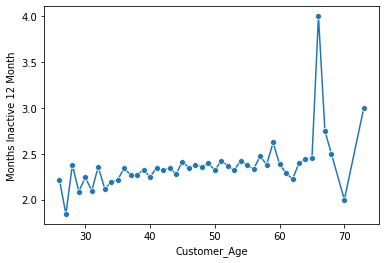

In [11]:
ax = sns.lineplot(data=data, x="Customer_Age", y="Months_Inactive_12_mon", marker="o", palette="deep", ci=None)
ax.set(xlabel='Customer_Age', ylabel='Months Inactive 12 Month')

**6. Bagaimana korelasi antara jumlah transaksi dan jumlah kredit yang dikeluarkan ?**

Dari scatterplot dibawah, dapat disimpulkan bahwa total transaction count dengan total transaction amount berelasi cukup kuat atau berelasi positif karena bentuk penyebaran data membentuk garis diagonal dari bawah kiri ke kanan atas. Jika kita menghitung nilai korelasinya maka kita akan mendapatkan nilai sebesar 0.81 yang artinya korelasi antara keduanya itu cukup kuat

In [12]:
fig = ex.scatter(y=data["Total_Trans_Ct"], x=data["Total_Trans_Amt"])
fig.update_layout(title_text="Scater Plot Total Transaction Amount dengan Total Transaction Count", xaxis_title="Total Transaction Amount", yaxis_title="Total Transaction Count")
fig.show()

**7. Bagaimana korelasi pada setiap kolomnya pada data bank churners ?**

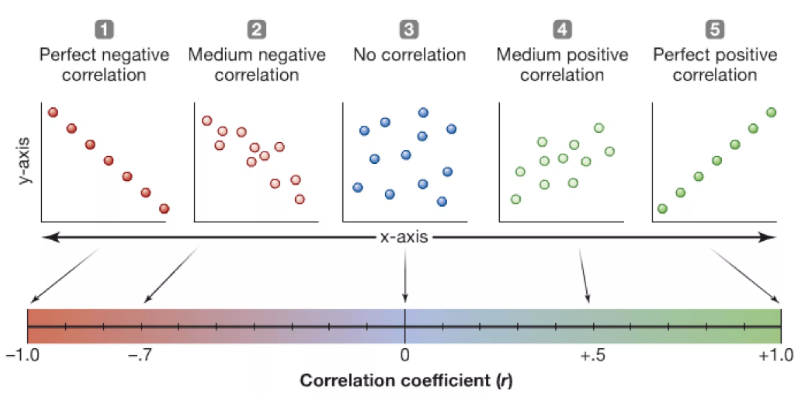

Dari heatmap dibawah ini maka dapat disimpulkan :
1. Credit Limit memiliki korelasi sangat kuat dengan Average Open to Buy dengan nilai korelasi negatif sebesar 1
1. Total Revolving Balance memiliki korelasi cukup kuat dengan Average Card Utilization Ratio dengan nilai korelasi negatif sebesar 0.62
1. Total Transaction Amount memiliki korelasi cukup leman dengan Total Relationship Count dengan nilai korelasi negatif sebesar -0.35
1. Average Card Utilization Ratio memiliki korelasi cukup lemah dengan Credit Limit dengan nilai korelasi negatif sebesar -0.48

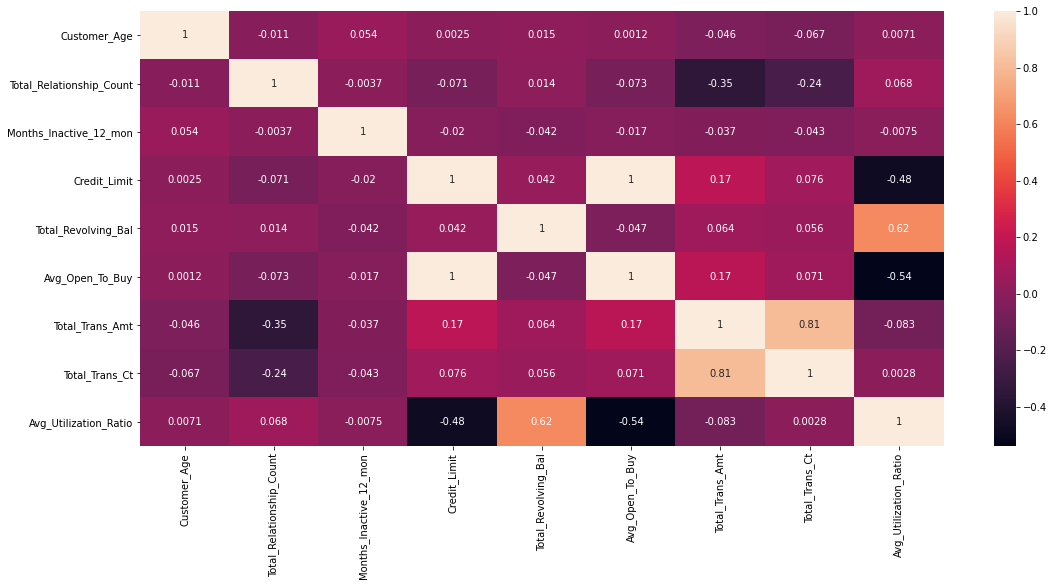

In [13]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True)